In [16]:
import cv2
import os
import matplotlib.pyplot as plt

### Histogram eq

In [8]:
op_R, op_G, op_B = cv2.equalizeHist(r), cv2.equalizeHist(g),cv2.equalizeHist(b)
img_op = cv2.merge((op_R, op_G, op_B))

### Contrast Limited adaptive Histogram Equilization

In [26]:
def clahe_img(img):
    r, g, b = cv2.split(img)
    clahe = cv2.createCLAHE(clipLimit = 2.0, tileGridSize = (8, 8))
    op_R_2, op_G_2, op_B_2 = clahe.apply(r), clahe.apply(g),clahe.apply(b)
    img_op_clahe = cv2.merge((op_R_2, op_G_2, op_B_2))
    return img_op_clahe

## Output

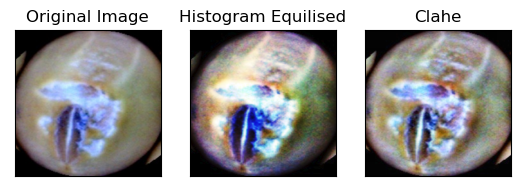

In [12]:
output = [img, img_op, img_op_clahe]
titles = ['Original Image', 'Histogram Equilised', 'Clahe']

for i in range(3):
    plt.subplot(1,3, i+1)
    plt.imshow(output[i])
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
plt.show()

# Creating histogram quilized dataset

In [27]:
source_ds = 'original dataset'
destination_ds = 'Histogram equalised dataset'

In [28]:
for class_name in os.listdir(source_ds):
    class_dir = os.path.join(source_ds, class_name)
    dest_class_dir = os.path.join(destination_ds, class_name)
    
    # Create the destination class directory if it doesn't exist
    os.makedirs(dest_class_dir, exist_ok=True)
    
    for img_name in os.listdir(class_dir):
        img_path = os.path.join(class_dir, img_name)
        img = cv2.imread(img_path)
        
        if img is not None:
            equ_img = clahe_img(img)
            dest_img_path = os.path.join(dest_class_dir, img_name)
            cv2.imwrite(dest_img_path, equ_img)
